# Numerical experiments:

### Preparations

In [1]:
import numpy as np
import matplotlib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
import matplotlib.pyplot as plt
import setup
import cg

latex_plots = True # enabling this can cause performance issues on some systems

if latex_plots:
    matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
    matplotlib.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,
        'font.size': '11'
    })

variants = ['cg', 'pr_cg', 'p_cg', 'mpr_cg', 'mp_cg', 'pipe_pr_cg', 'pipe_p_cg', 'pipe_mpr_cg', 'pipe_mp_cg']
labels = ['CG', 'PR-CG', 'PR-CG (n.r.)', 'M-CG', 'M-CG (n.r.)', 'PIPE-PR-CG', 'PIPE-PR-CG (n.r.)', 'PIPE-M-CG', 'PIPE-M-CG (n.r.)']
styles = ['k', 'b', 'b:', 'r', 'r:', 'c', 'c:', 'm', 'm:']

def convergence_plots(A, b, x0, x_exact, preconditioner=lambda x:x, max_iter=1000):
    fig, ax = plt.subplots(1, 2, figsize=[10, 5])
    for variant, label, style in zip(variants, labels, styles):
        x, xm, rm = cg.pcg(A, b, x0, preconditioner, max_iter=max_iter, eps=0.0, variant=variant)
        em = xm - x_exact
        e_2norm = np.linalg.norm(em, axis=1)
        e_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, em)
        r_2norm = np.linalg.norm(rm, axis=1)
        r_Anorm = np.apply_along_axis(lambda e: np.sqrt(e.T @ A @ e), 1, rm)
        m = np.arange(1,len(xm)+1)
        ax[0].semilogy(m, e_2norm, style, label=label)
        ax[1].semilogy(m, r_2norm, style, label=label)
    ax[0].legend()
    ax[1].legend()
    ax[0].set_xlabel('iteration $m$', fontsize=14)
    ax[1].set_xlabel('iteration $m$', fontsize=14)
    ax[0].set_ylabel('$||x^{(m)} - x||_2$', fontsize=14)
    ax[1].set_ylabel('$||b - A x^{(m)}||_2$', fontsize=14)
    ax[0].set_title('Error convergence in $||\cdot||_2$-norm', fontsize=16)
    ax[1].set_title('Residual convergence in $||\cdot||_2$-norm', fontsize=16)
    ax[0].grid()
    ax[1].grid()
    return fig, ax

### Poisson 1D

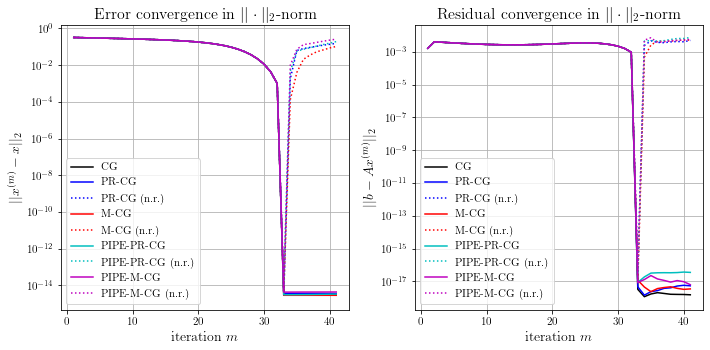

In [2]:
A, b, x_exact, x0 = setup.poisson_1d(n=64, dtype=np.float64)

fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=40)
plt.tight_layout()
plt.savefig('plots/poisson1d.pdf')

### Poisson 2D (no preconditioner, double precision)

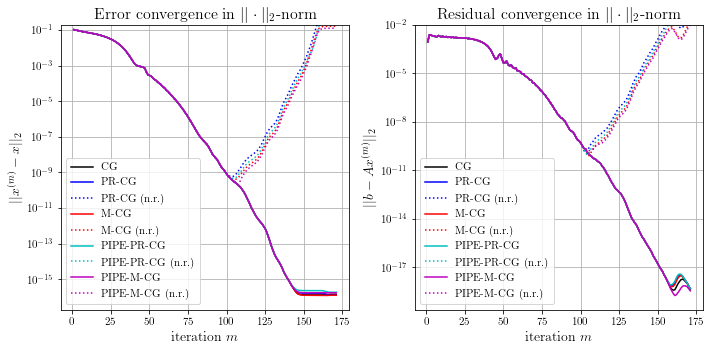

In [3]:
A, b, x_exact, x0 = setup.poisson_2d(n=64, dtype=np.float64)

fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=170)
ax[0].set_ylim([None, 0.2])
ax[1].set_ylim([None, 1e-2])
plt.tight_layout()
plt.savefig('plots/poisson2d_double.pdf')

### Poisson 2D (no preconditioner, single precision)

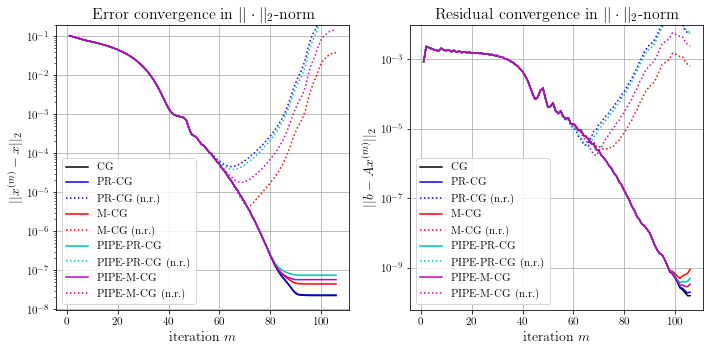

In [4]:
A, b, x_exact, x0 = setup.poisson_2d(n=64, dtype=np.float32)

fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=105)
ax[0].set_ylim([None, 0.2])
ax[1].set_ylim([None, 1e-2])
plt.tight_layout()
plt.savefig('plots/poisson2d_single.pdf')

### BCSSTK03 (no preconditioner, double precision)

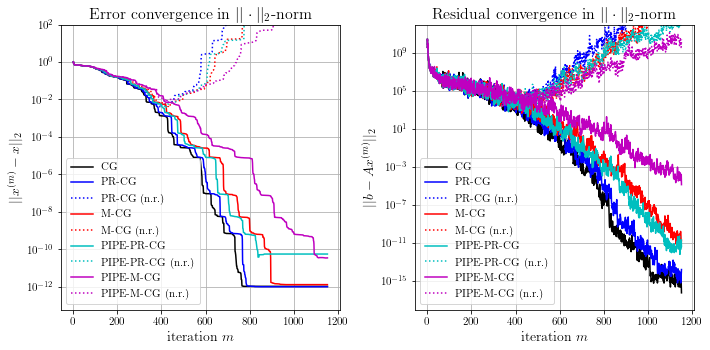

In [5]:
A, b, x_exact, x0 = setup.matrix_market('bcsstk03', np.float64)

fig, ax = convergence_plots(A, b, x0, x_exact, max_iter=1150)
ax[0].set_ylim([None, 1e2])
ax[1].set_ylim([None, 1e12])
plt.tight_layout()
plt.savefig('plots/bcsstk03.pdf')

### BCSSTK03 (Jacobi preconditioner, double precision)

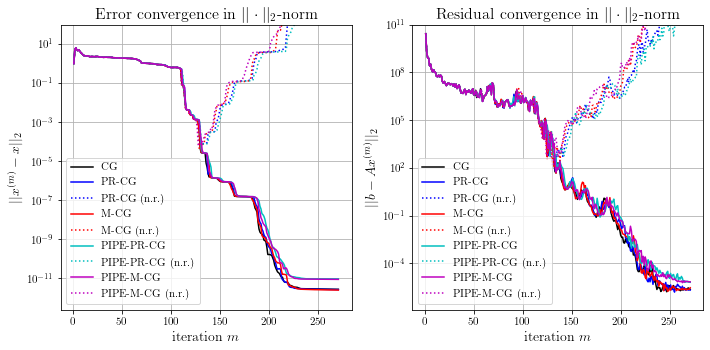

In [6]:
A, b, x_exact, x0 = setup.matrix_market('bcsstk03', np.float64)

# jacobi preconditioner
preconditioner = lambda x: (1/A.diagonal())*x

fig, ax = convergence_plots(A, b, x0, x_exact, preconditioner, max_iter=270)
ax[0].set_ylim([None, 1e2])
ax[1].set_ylim([None, 1e11])
plt.tight_layout()
plt.savefig('plots/bcsstk03_jac.pdf')

### Structure plot:

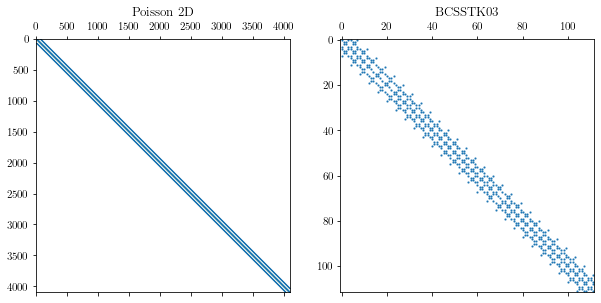

In [7]:
A1, b, x_exact, x0 = setup.poisson_2d(n=64, dtype=np.float64)
A2, b, x_exact, x0 = setup.matrix_market('bcsstk03', np.float64)

fig, ax = plt.subplots(1, 2, figsize=[10, 5])
ax[0].spy(A1, markersize=0.1)
ax[0].set_title('Poisson 2D')
ax[1].spy(A2, markersize=1)
ax[1].set_title('BCSSTK03')
plt.savefig('plots/structure.pdf')